<a href="https://colab.research.google.com/github/Xiaojun-Wei/ML-keras-to-kubernetes-study-notes/blob/main/Ch4_%E4%BD%BF%E7%94%A8keras%E8%BF%9B%E8%A1%8C%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 处理非结构化数据

## 4.1.1 神经网络

**4-1 加载手写数字数据集 MNIST**

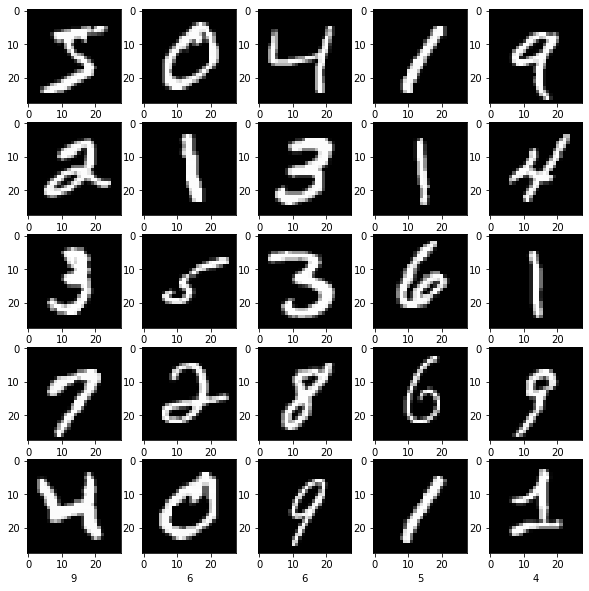

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
mnist = keras.datasets.mnist
# 加载训练数据和测试数据
(img_rows, img_cols) = (28, 28)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap=plt.cm.gray)
  plt.xlabel(y_test[i])
plt.show()


**4-2 训练数据和测试数据的归一化，以便更快地学习**

In [17]:
from tensorflow.keras.utils import to_categorical

# one hot encode the result
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 查看数据的尺寸
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# 将数据归一化到0～1范围内的值
x_train, x_test = x_train /255.0, x_test / 255.0

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


**4-3 第一个神经网络代码**

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# 建立一个简单的神经网络
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 显示摘要
model.summary()

# assign the optimizer for the model and define loss function
# 分配优化器和定义损失函数
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 训练
history = model.fit(x_train, y_train, epochs=1, validation_split=0.33)

# 评估
model.evaluate(x_test, y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 0.1371 - accuracy: 0.9583


[0.1371423751115799, 0.958299994468689]